In [1]:
import xarray as xr
import act
import metpy.plots
%pylab inline

/home/rjackson/.conda/envs/pydda_env/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
classification_ds = xr.open_dataset('Clusters_new10.nc')

/home/rjackson/.conda/envs/pydda_env/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


(array([5196.,  469., 4880., 4737.,    0., 1075.,  722.,  853., 5329.,
         869.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

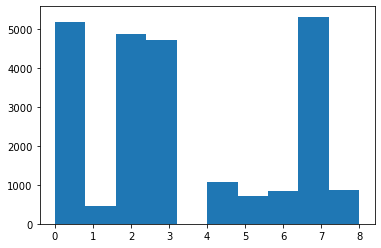

In [44]:
plt.hist(classification_ds.classification.values)

/tmp/ipykernel_2895048/1232373247.py:7: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  hour_hists[i, :] = np.histogram(hour[classification == i], bins=time_bins, normed=False)[0]*5/60


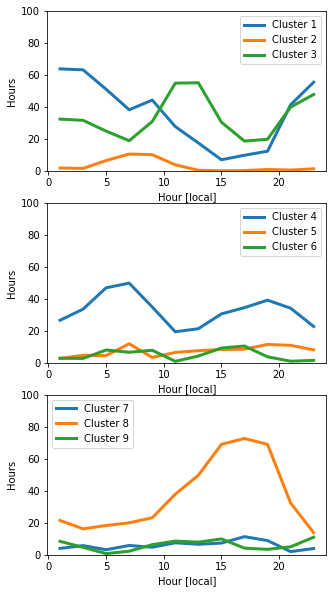

In [46]:
classification = classification_ds.classification.values
hour = classification_ds.time.dt.hour.values - 5
hour[hour < 0] += 24
time_bins = np.arange(0., 25., 2.)
hour_hists = np.zeros((9, 12))
for i in range(9):
    hour_hists[i, :] = np.histogram(hour[classification == i], bins=time_bins, normed=False)[0]*5/60

fig, ax = plt.subplots(3, 1, figsize=(5, 10))
for i in range(3):
    ax[0].plot(time_bins[:-1]+1, hour_hists[i], label = 'Cluster %d' % (i + 1), linewidth=3)
ax[0].legend()
ax[0].set_ylim([0, 100])
ax[0].set_xlabel('Hour [local]')
ax[0].set_ylabel('Hours')

for i in range(3,6):
    ax[1].plot(time_bins[:-1]+1, hour_hists[i], label = 'Cluster %d' % (i + 1), linewidth=3)
ax[1].legend()
ax[1].set_ylim([0, 100])
ax[1].set_xlabel('Hour [local]')
ax[1].set_ylabel('Hours')

for i in range(6,9):
    ax[2].plot(time_bins[:-1]+1, hour_hists[i], label = 'Cluster %d' % (i + 1), linewidth=3)
ax[2].legend()
ax[2].set_ylim([0, 100])
ax[2].set_xlabel('Hour [local]')
ax[2].set_ylabel('Hours')

fig.savefig('Time_periods9.png', dpi=300)

In [4]:
soundings_ds = xr.open_mfdataset('/lcrc/group/earthscience/rjackson/sgpsonde/*.cdf')

In [ ]:
soundings_ds

In [5]:
classification_ds = classification_ds.reindex(time=soundings_ds.time, method='nearest', tolerance=1e9*3600*6)

In [6]:
classification_ds.load()
soundings_ds.load()

<xarray.Dataset>
Dimensions:      (time: 2144545)
Coordinates:
  * time         (time) datetime64[ns] 2017-06-29T23:32:00 ... 2017-10-02T01:...
Data variables: (12/25)
    base_time    (time) datetime64[ns] 2017-06-29 2017-06-29 ... 2017-10-01
    time_offset  (time) datetime64[ns] 2017-06-29T23:32:00 ... 2017-10-02T01:...
    qc_time      (time) int32 0 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2
    pres         (time) float32 969.2 968.4 967.6 967.0 ... 17.85 17.84 17.82
    qc_pres      (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    tdry         (time) float32 34.3 33.46 33.29 33.11 ... -49.36 -49.37 -49.37
    ...           ...
    wstat        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    asc          (time) float32 0.0 7.3 6.8 6.1 5.8 6.0 ... 6.0 5.5 5.0 5.0 4.8
    qc_asc       (time) int32 0 8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    lat          (time) float32 36.61 36.61 36.61 36.61 ... 37.02 37.02 37.02
    lon          (time) float32 -97.49 -97.49 -97.49 ... -96.66 -96.66 -96.66
    alt          (time) float32 314.8 322.2 329.0 ... 2.734e+04 2.735e+04
Attributes: (12/39)
    command_line:               sonde_ingest -s sgp -f C1
    process_version:            ingest-sonde-10.12-0.el6
    ingest_software:            ingest-sonde-10.12-0.el6
    dod_version:                sondewnpn-b1-2.1
    site_id:                    sgp
    facility_id:                C1: Lamont, Oklahoma
    ...                         ...
    qc_bit_3_description:       Value is greater than the valid_max.
    qc_bit_3_assessment:        Bad
    qc_bit_4_description:       Difference between current and previous value...
    qc_bit_4_assessment:        Indeterminate
    zeb_platform:               sgpsondewnpnC1.b1
    history:                    created by user dsmgr on machine ruby at 2017...

In [63]:
hour = classification_ds.time.dt.hour.values - 5
height_bins = np.linspace(1000., 100., 100)
num_clusters = 10
pres = np.zeros((num_clusters, len(height_bins)-1))
u_wind = np.zeros((num_clusters, len(height_bins)-1))
v_wind = np.zeros((num_clusters, len(height_bins)-1))
dp = np.zeros((num_clusters, len(height_bins)-1))
tdry = np.zeros((num_clusters, len(height_bins)-1))
thetae_mean = np.zeros((num_clusters, len(height_bins)-1))
rh_mean = np.zeros((num_clusters, len(height_bins) - 1))
night = np.logical_or(hour < 6, hour > 19)
for i in range(num_clusters):
    for j in range(len(height_bins) - 1):
        the_inds = np.logical_and.reduce((classification_ds.classification.values == i, soundings_ds.pres.values <= height_bins[j],
                                          soundings_ds.pres.values >= height_bins[j + 1]))
        u_wind[i, j] = np.nanmean(soundings_ds.u_wind.values[the_inds])
        v_wind[i, j] = np.nanmean(soundings_ds.v_wind.values[the_inds])
        dp[i, j] = np.nanmean(soundings_ds.dp.values[the_inds])
        tdry[i, j] = np.nanmean(soundings_ds.tdry.values[the_inds])
        #thetae_mean[i, j] = np.nanmean(thetae.values[the_inds])
        rh_mean[i, j] = np.nanmean(soundings_ds.rh.values[the_inds])

/tmp/ipykernel_2070023/3922902276.py:16: RuntimeWarning: Mean of empty slice
  u_wind[i, j] = np.nanmean(soundings_ds.u_wind.values[the_inds])
/tmp/ipykernel_2070023/3922902276.py:17: RuntimeWarning: Mean of empty slice
  v_wind[i, j] = np.nanmean(soundings_ds.v_wind.values[the_inds])
/tmp/ipykernel_2070023/3922902276.py:18: RuntimeWarning: Mean of empty slice
  dp[i, j] = np.nanmean(soundings_ds.dp.values[the_inds])
/tmp/ipykernel_2070023/3922902276.py:19: RuntimeWarning: Mean of empty slice
  tdry[i, j] = np.nanmean(soundings_ds.tdry.values[the_inds])
/tmp/ipykernel_2070023/3922902276.py:21: RuntimeWarning: Mean of empty slice
  rh_mean[i, j] = np.nanmean(soundings_ds.rh.values[the_inds])


In [9]:
soundings_ds

NameError: name 'soundings_ds' is not defined

In [36]:
soundings_ds.tdry.attrs["units"] = "degC"
soundings_ds.dp.attrs["units"] = "degC"
thetae = metpy.calc.equivalent_potential_temperature(soundings_ds.pres, soundings_ds.tdry, soundings_ds.dp)

In [52]:
tdry[5]

array([ 23.6736412 ,  23.76533508,  23.26537132,  22.84801674,
        22.51607513,  21.81934738,  21.10675621,  20.44233322,
        19.98239136,  19.22249413,  18.54106331,  18.08358955,
        17.64891624,  17.14812851,  16.75466347,  16.28186607,
        15.88057613,  15.78391838,  15.43877602,  14.82459927,
        14.24902058,  13.61777306,  13.16200066,  12.62470055,
        12.1013689 ,  11.56821728,  10.8323431 ,  10.25443268,
         9.65581322,   8.97024155,   8.31419086,   7.61646414,
         6.99882507,   6.48014832,   5.86104774,   5.19311523,
         4.55390549,   3.86124086,   3.06778073,   2.37164855,
         1.62583983,   0.89474088,   0.31562933,  -0.33195969,
        -0.89637834,  -1.62687171,  -2.36300015,  -3.08055758,
        -3.73201752,  -4.3696661 ,  -5.21078968,  -5.86866188,
        -6.73479939,  -7.62107563,  -8.44217205,  -9.19464493,
       -10.19489288, -11.19036293, -12.19583225, -13.12066078,
       -13.95845795, -15.00893211, -16.18878746, -17.32

[22.72428703]
[19.75439453]
[21.96444511]
[20.2314682]
[18.0700016]
[17.66552353]
[20.59666634]
[14.25]
[25.68250084]
[23.39500046]


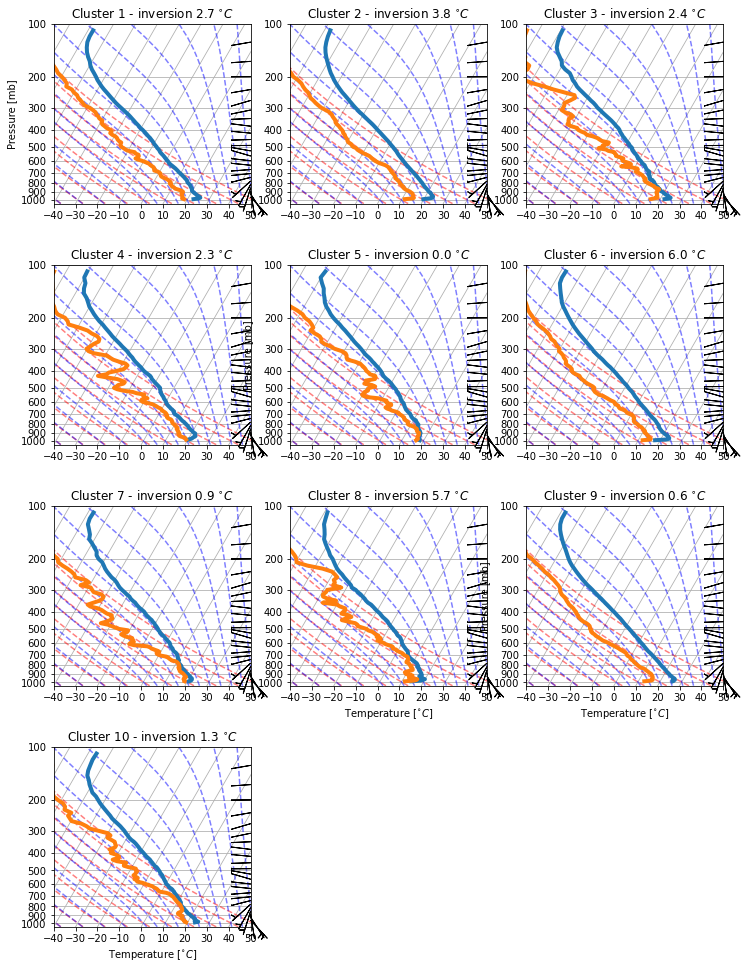

In [84]:
fig = plt.figure(figsize=(12, 17))
for i in range(10):
    skewT = metpy.plots.SkewT(fig=fig, subplot=(4, 3, (i + 1)))
    skewT.plot(height_bins[:-1], tdry[i], linewidth=4)
    skewT.plot(height_bins[:-1], dp[i], linewidth=4)
    tdry_filled = np.nan_to_num(tdry[i], -9999.)
    temp_peak = np.argmax(tdry_filled)
    temp_first = np.argwhere(np.isfinite(tdry[i]))[0]
    print(tdry[i, temp_first])
    skewT.plot_barbs(height_bins[:-1:4], u_wind[0][::4], v_wind[0][::4])
    skewT.plot_dry_adiabats()
    skewT.plot_moist_adiabats()
    skewT.ax.set_title('Cluster %d - inversion %2.1f $^{\circ}C$' % (i + 1, (tdry[i, temp_peak] - tdry[i, temp_first])))
    if i % 4 == 0:
        skewT.ax.set_ylabel('Pressure [mb]')
    if i > 6:
        skewT.ax.set_xlabel('Temperature [$^{\circ}C$]')

fig.savefig('Sounding_clusters.png', dpi=300, bbox_inches='tight')

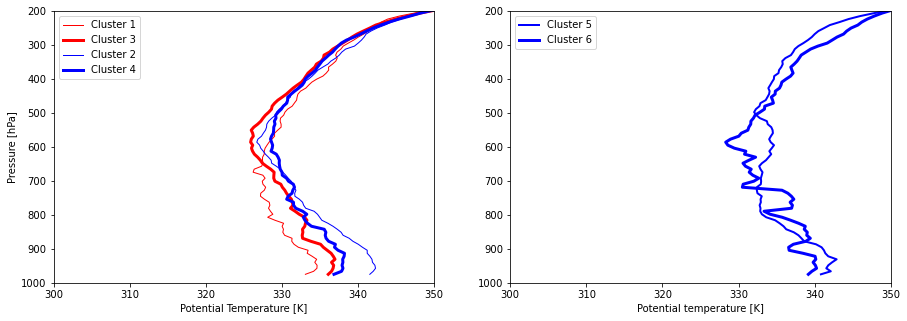

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(0, 3, 2):
    ax[0].plot(thetae_mean[i], height_bins[:-1], label="Cluster %d" % (i+1), color='r', linewidth=i+1)
ax[0].set_xlabel('Potential Temperature [K]')
ax[1].set_xlabel('Potential Temperature [K]')
ax[0].set_ylabel('Pressure [hPa]')
for i in range(1, 4, 2):
    ax[0].plot(thetae_mean[i], height_bins[:-1], label="Cluster %d" % (i+1), color='b', linewidth=i)
for i in range(4, 6):
    ax[1].plot(thetae_mean[i], height_bins[:-1], label="Cluster %d" % (i+1), color='b', linewidth=i-2)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.xlabel('Potential temperature [K]')
ax[0].legend()
ax[1].legend()
for i in range(2):
    ax[i].set_xlim([300, 350])
    ax[i].set_ylim([1000, 200])
fig.savefig('thetae_clusters_day.png')

(300.0, 400.0)

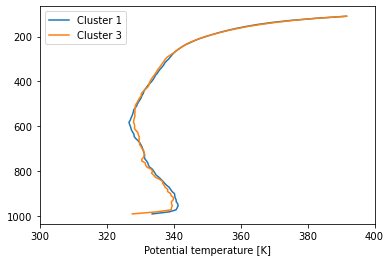

In [ ]:
for i in range(1, 4, 2):
    plt.plot(thetae_mean[i], height_bins[:-1], label="Cluster %d" % i)
plt.gca().invert_yaxis()
plt.xlabel('Potential temperature [K]')
plt.legend()
plt.xlim([300, 400])

In [5]:
met_ds = xr.open_mfdataset('/lambda_stor/data/rjackson/sgpmet/*.cdf')
met_ds

<xarray.Dataset>
Dimensions:                       (time: 124724)
Coordinates:
  * time                          (time) datetime64[ns] 2017-06-29 ... 2017-1...
Data variables: (12/50)
    base_time                     (time) datetime64[ns] 2017-06-29 ... 2017-1...
    time_offset                   (time) datetime64[ns] dask.array<chunksize=(1440,), meta=np.ndarray>
    atmos_pressure                (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_temp_mean                  (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           (time) float32 36.6 36.6 36.6 ... 36.6 36.6
    lon                           (time) float32 -97.49 -97.49 ... -97.49 -97.49
    alt                           (time) float32 318.0 318.0 ... 318.0 318.0
Attributes: (12/29)
    command_line:                met_ingest -s sgp -f E13 -D -R
    process_version:             ingest-met-4.37-0.el6
    dod_version:                 met-b1-7.3
    input_source:                /data/project/0021718_1509993009/D170828.24/...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_2_assessment:         Bad
    qc_bit_3_description:        Value is greater than the valid_max.
    qc_bit_3_assessment:         Bad
    qc_bit_4_description:        Difference between current and previous valu...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user giansiracusa on machine ambe...

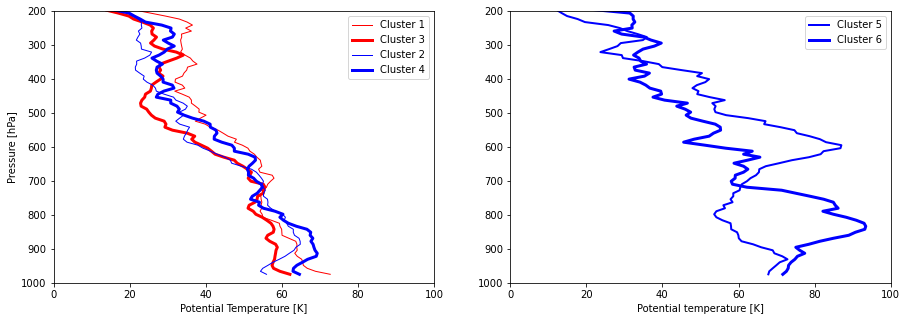

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(0, 3, 2):
    ax[0].plot(rh_mean[i], height_bins[:-1], label="Cluster %d" % (i+1), color='r', linewidth=i+1)
ax[0].set_xlabel('Potential Temperature [K]')
ax[1].set_xlabel('Potential Temperature [K]')
ax[0].set_ylabel('Pressure [hPa]')
for i in range(1, 4, 2):
    ax[0].plot(rh_mean[i], height_bins[:-1], label="Cluster %d" % (i+1), color='b', linewidth=i)
for i in range(4, 6):
    ax[1].plot(rh_mean[i], height_bins[:-1], label="Cluster %d" % (i+1), color='b', linewidth=i-2)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.xlabel('Relative humidity [%]')
ax[0].legend()
ax[1].legend()
for i in range(2):
    ax[i].set_xlim([0, 100])
    ax[i].set_ylim([1000, 200])
fig.savefig('rh_clusters.png')

In [6]:
met_ds = met_ds.reindex(time=classification_ds.time, method='nearest', tolerance=300*1e9)

/tmp/ipykernel_2895048/1295021795.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(met_ds.wspd_arith_mean.values[inds], bins=rh_bins, normed=True)
/tmp/ipykernel_2895048/1295021795.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(met_ds.temp_mean.values[inds], bins=temp_bins, normed=True)
/tmp/ipykernel_2895048/1295021795.py:7: Vis

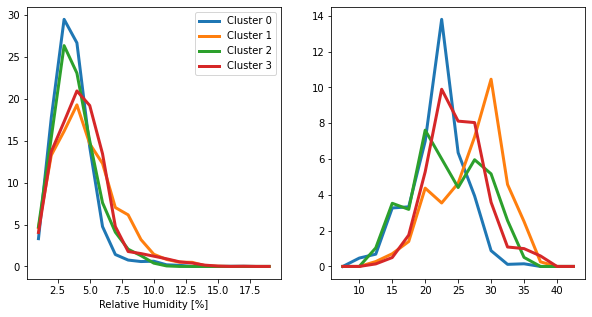

In [14]:
rh_bins = np.arange(0, 20., 1.)
temp_bins = np.arange(5., 45., 2.5)
rh_hist = np.zeros((6, 10))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(4):
    inds = np.argwhere(classification_ds.classification.values == i)
    hist, bins = np.histogram(met_ds.wspd_arith_mean.values[inds], bins=rh_bins, normed=True)
    ax[0].plot(bins[1:], hist*100, label="Cluster %d" % i, linewidth=3)
    
    hist, bins = np.histogram(met_ds.temp_mean.values[inds], bins=temp_bins, normed=True)
    ax[1].plot(bins[1:], hist*100, label="Cluster %d" % i, linewidth=3)
    ax[0].set_xlabel('Relative Humidity [%]')
    ax[0].set_xlabel('Relative Humidity [%]')
ax[0].legend()

#for i in range(4, 6):
#    inds = np.argwhere(classification_ds.classification.values == i)
#    hist, bins = np.histogram(met_ds.rh_mean.values[inds], bins=rh_bins, normed=True)
#    ax[1,0].plot(bins[1:], hist*100, label="Cluster %d" % i, linewidth=3)
    
#    hist, bins = np.histogram(met_ds.temp_mean.values[inds], bins=temp_bins, normed=True)
#    ax[1,1].plot(bins[1:], hist*100, label="Cluster %d" % i, linewidth=3)
#    ax[1,1].set_xlabel('Temperature [$^{\circ}C$]')
#ax[1,1].legend()
fig.savefig('Wind_temp_clusters_new.png')

In [143]:
met_ds.temp_mean.values

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

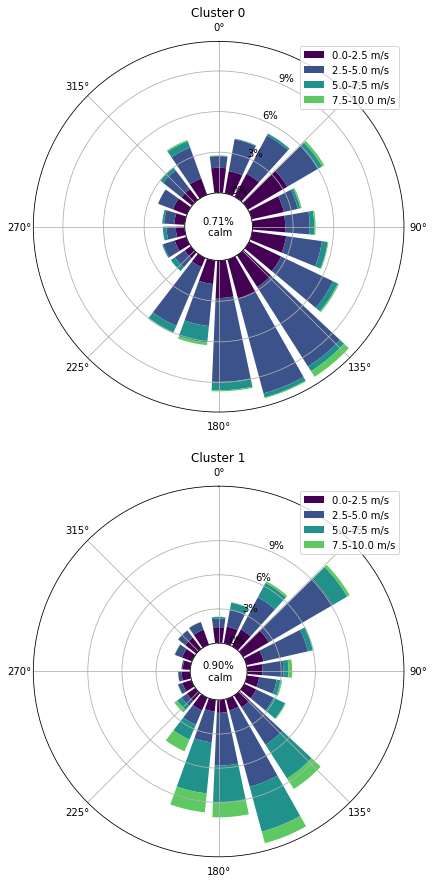

In [8]:
rose_disp = act.plotting.WindRoseDisplay(met_ds, subplot_shape=(2, 1), figsize=(7,15))
for i in range(2):
    temp_disp = act.plotting.WindRoseDisplay(met_ds.where(classification_ds.classification == i))
    rose_disp.put_display_in_subplot(temp_disp, (i % 3,))
    temp_disp.plot('wdir_vec_mean', 'wspd_arith_mean', spd_bins=np.arange(0., 12.5, 2.5))    
    temp_disp.axes[0].set_title('Cluster %d' % i)
rose_disp.fig.savefig('wind_clusters01_new.png')

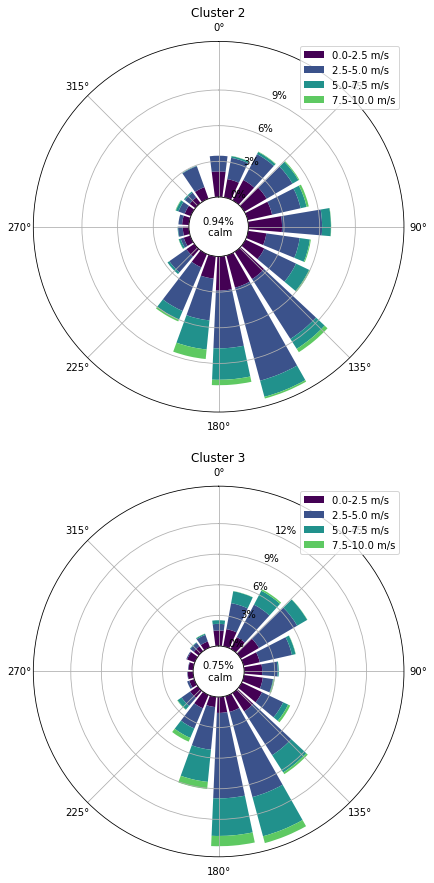

In [10]:
rose_disp = act.plotting.WindRoseDisplay(met_ds, subplot_shape=(2, 1), figsize=(7,15))
for i in range(2, 4):
    temp_disp = act.plotting.WindRoseDisplay(met_ds.where(classification_ds.classification == i))
    rose_disp.put_display_in_subplot(temp_disp, (i % 2,))
    temp_disp.plot('wdir_vec_mean', 'wspd_arith_mean', spd_bins=np.arange(0., 12.5, 2.5))    
    temp_disp.axes[0].set_title('Cluster %d' % i)
rose_disp.fig.savefig('wind_clusters23_new.png')

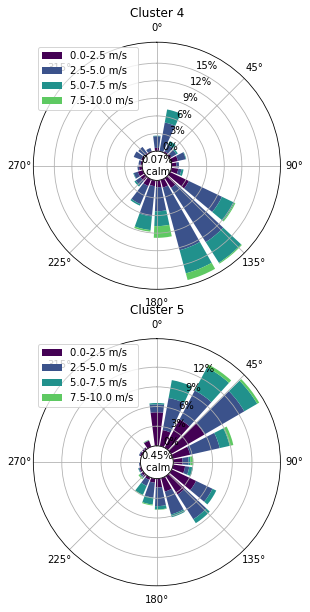

In [163]:
rose_disp = act.plotting.WindRoseDisplay(met_ds, subplot_shape=(2, 1), figsize=(7,10))
for i in range(4, 6):
    temp_disp = act.plotting.WindRoseDisplay(met_ds.where(classification_ds.classification == i))
    rose_disp.put_display_in_subplot(temp_disp, (i % 2,))
    temp_disp.plot('wdir_vec_mean', 'wspd_arith_mean', spd_bins=np.arange(0., 12.5, 2.5))    
    temp_disp.axes[0].set_title('Cluster %d' % i)
fig.savefig('wind_clusters45.png')

In [70]:
month = classification_ds.time.dt.month.values

[0.65818883 0.34181117]
[0.45379801 0.54620199]


/tmp/ipykernel_4148967/1359125897.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(month[inds], bins=np.array([7.5, 8.5, 9.5]), normed=True)
/tmp/ipykernel_4148967/1359125897.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(month[inds], bins=np.array([7.5, 8.5, 9.5]), normed=True)


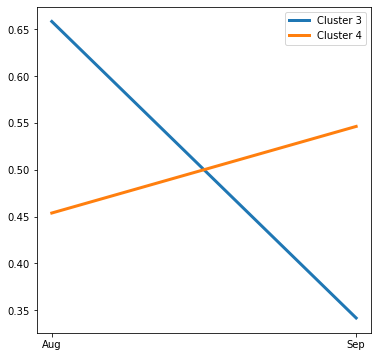

In [77]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
for i in range(2, 4):
    inds = np.argwhere(classification_ds.classification.values == i)
    hist, bins = np.histogram(month[inds], bins=np.array([7.5, 8.5, 9.5]), normed=True)
    ax.plot(bins[:-1]+0.5, hist, label="Cluster %d" % (i + 1), linewidth=3)
    print(hist)
ax.set_xticks([8, 9])
ax.set_xticklabels(["Aug", "Sep"])
ax.legend()

In [132]:
classification_ds.classification.reindex(time=met_ds.time)

<xarray.DataArray 'classification' (time: 124724)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 2017-06-29 ... 2017-10-01T23:59:00

In [131]:
met_ds

<xarray.Dataset>
Dimensions:                       (time: 124724)
Coordinates:
  * time                          (time) datetime64[ns] 2017-06-29 ... 2017-1...
Data variables: (12/50)
    base_time                     (time) datetime64[ns] 2017-06-29 ... 2017-1...
    time_offset                   (time) datetime64[ns] dask.array<chunksize=(1440,), meta=np.ndarray>
    atmos_pressure                (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_temp_mean                  (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           (time) float32 36.6 36.6 36.6 ... 36.6 36.6
    lon                           (time) float32 -97.49 -97.49 ... -97.49 -97.49
    alt                           (time) float32 318.0 318.0 ... 318.0 318.0
Attributes: (12/29)
    command_line:                met_ingest -s sgp -f E13 -D -R
    process_version:             ingest-met-4.37-0.el6
    dod_version:                 met-b1-7.3
    input_source:                /data/project/0021718_1509993009/D170828.24/...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_2_assessment:         Bad
    qc_bit_3_description:        Value is greater than the valid_max.
    qc_bit_3_assessment:         Bad
    qc_bit_4_description:        Difference between current and previous valu...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user giansiracusa on machine ambe...